In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 23kB/s 
     |████████████████████████████████| 4.0MB 51.3MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


In [ ]:
from sklearn.metrics import classification_report 
from fastai import *   
from fastai.vision import * 
! pip install -q kaggle
from google.colab import files 
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! mkdir finaldataset

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

100% 672M/675M [00:05<00:00, 108MB/s]
100% 675M/675M [00:06<00:00, 118MB/s]


In [ ]:
!unzip cell-images-for-detecting-malaria -d finaldataset

Streaming output truncated to the last 5000 lines.
  inflating: finaldataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: finaldataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: finaldataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: finaldataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: finaldataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: finaldataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: finaldataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: finaldataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: finaldataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.p

In [ ]:
import os
import cv2
import os.path
from google.colab.patches import cv2_imshow

In [ ]:
parasitized_data=os.listdir('finaldataset/cell_images/Parasitized')
for img in parasitized_data:
  try:
    img_read = cv2.imread('finaldataset/cell_images/Parasitized/' + img)
    img_gray=cv2.cvtColor(img_read,cv2.COLOR_BGR2GRAY)
    img_resize=cv2.resize(img_gray,(50,50))
    cv2.imwrite('finaldataset/cell_images/Parasitized/' + img,img_resize)
    cv2.waitKey(0)
  except:
    None

In [ ]:
uninfected_data=os.listdir('finaldataset/cell_images/Uninfected')
for img in uninfected_data:
  try:
    img_read = cv2.imread('finaldataset/cell_images/Uninfected/' + img)
    img_gray=cv2.cvtColor(img_read,cv2.COLOR_BGR2GRAY)
    img_resize=cv2.resize(img_gray,(50,50))
    cv2.imwrite('finaldataset/cell_images/Uninfected/' + img,img_resize)
    cv2.waitKey(0)
  except:
    None

In [ ]:
parasitized_data1=os.listdir('finaldataset/cell_images/cell_images/Parasitized')
for img in parasitized_data1:
  try:
    img_read = cv2.imread('finaldataset/cell_images/cell_images/Parasitized/' + img)
    img_gray=cv2.cvtColor(img_read,cv2.COLOR_BGR2GRAY)
    img_resize=cv2.resize(img_gray,(50,50))
    cv2.imwrite('finaldataset/cell_images/cell_images/Parasitized/' + img,img_resize)
    cv2.waitKey(0)
  except:
    None

In [ ]:
uninfected_data1=os.listdir('finaldataset/cell_images/cell_images/Uninfected')
for img in uninfected_data1:
  try:
    img_read = cv2.imread('finaldataset/cell_images/cell_images/Uninfected/' + img)
    img_gray=cv2.cvtColor(img_read,cv2.COLOR_BGR2GRAY)
    img_resize=cv2.resize(img_gray,(50,50))
    cv2.imwrite('finaldataset/cell_images/cell_images/Uninfected/' + img,img_resize)
    cv2.waitKey(0)
  except:
    None
cv2.destroyAllWindows() 

In [ ]:
data=ImageList.from_folder('finaldataset/cell_images')
data=data.split_by_rand_pct(valid_pct=0.2,seed=10)
data=data.label_from_folder()
data.databunch
tfms=get_transforms(do_flip=True,flip_vert=True,max_rotate=20.,max_zoom=1.1,max_lighting=0.2,max_warp=0.)

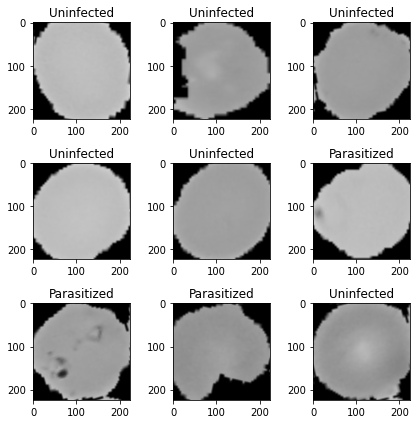

In [ ]:
data=data.transform(tfms=tfms,size=224,padding_mode='reflection')
data=data.databunch(bs=64,num_workers=4)
data=data.normalize(imagenet_stats)
data.show_batch(rows=3,figsize=(6,6),hide_axis=False)

In [ ]:
print('length of training set: {0}'.format(len(data.train_ds.x)))
print('length of validation dataset: {0}'.format(len(data.valid_ds.x)))
print('Number of classes: {0}'.format(data.c))
print(data.classes)


length of training set: 44093
length of validation dataset: 11023
Number of classes: 2
['Parasitized', 'Uninfected']


In [ ]:
learn=cnn_learner(data,models.resnet50,metrics=[error_rate,accuracy]).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


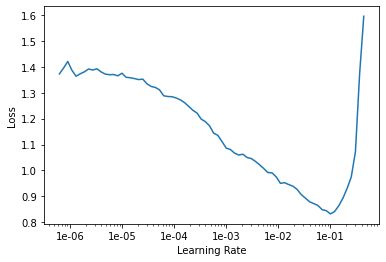

In [ ]:
learn.recorder.plot()

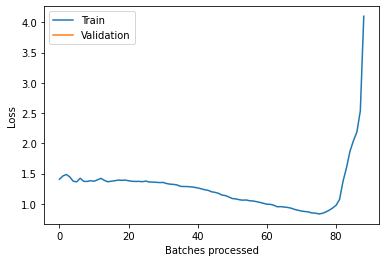

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.fit_one_cycle(2,1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.156959,0.137131,0.049170,0.950830,04:14
1,0.103968,0.088757,0.033838,0.966162,04:17


In [ ]:
learn.save('1st stage')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


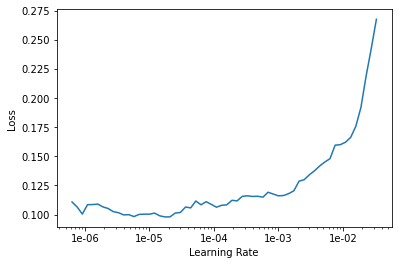

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2,1e-5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.101121,0.083331,0.029847,0.970153,04:47
1,0.093144,0.079617,0.028939,0.971061,04:44


In [ ]:
learn.save('2nd stage')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


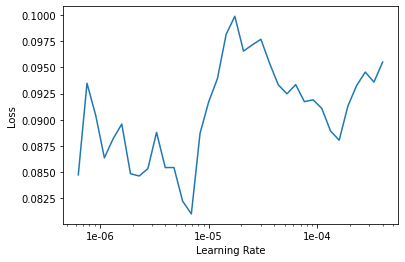

In [ ]:
learn.recorder.plot()

In [ ]:
learn.export('Model created')

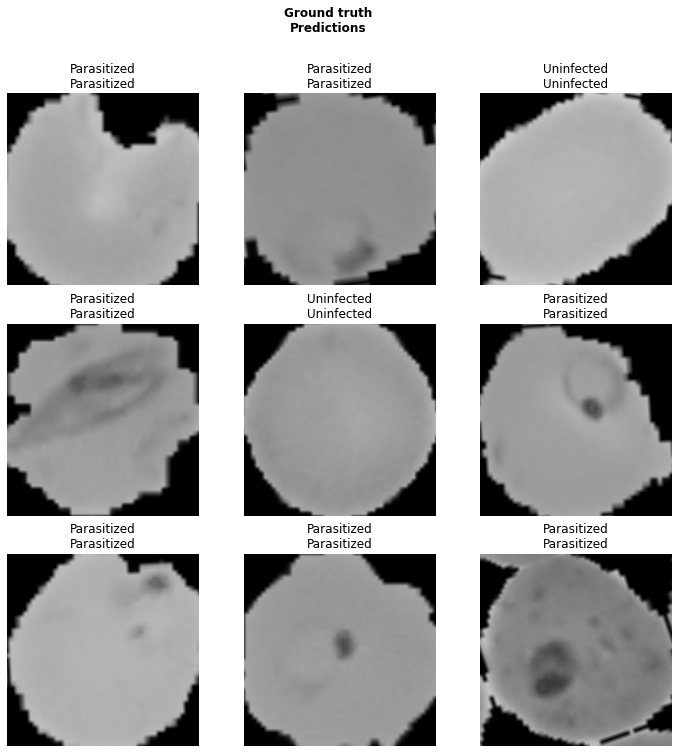

In [ ]:
learn.show_results(ds_type=DatasetType.Train,rows=3)

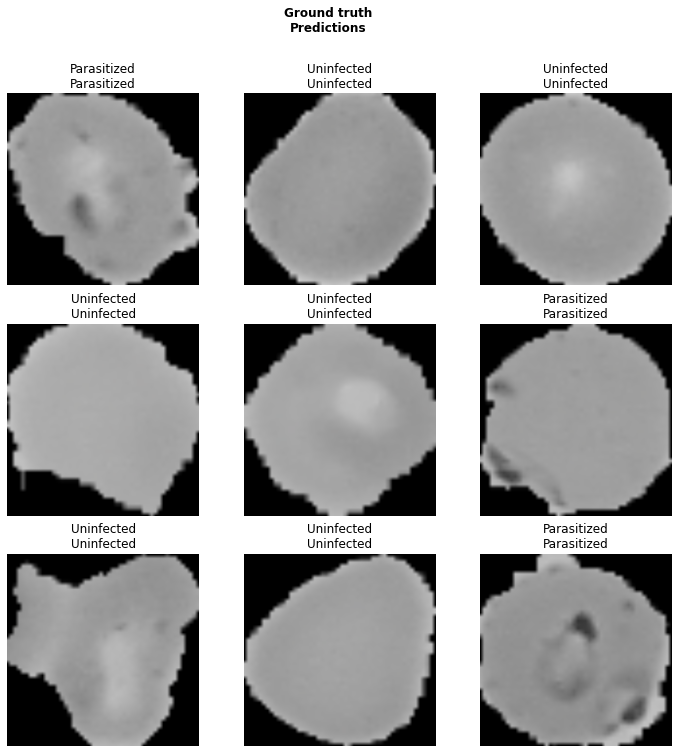

In [ ]:
learn.show_results(ds_type=DatasetType.Valid,rows=3)

In [ ]:
learn.validate(learn.data.train_dl)

[0.08282062, tensor(0.0291), tensor(0.9709)]

In [ ]:
learn.validate(learn.data.valid_dl)

[0.0796165, tensor(0.0289), tensor(0.9711)]

In [ ]:
img=cv2.imread('downloads\malariaparasite.jpg')

In [ ]:
prediction = learn.predict(img)

In [ ]:
print(prediction)

(Category tensor(0), tensor(0), tensor([0.9948, 0.0052]))


In [ ]:
img=cv2.imread('downloads\malariaparasite2.png')

In [ ]:
prediction = learn.predict(img)
print(prediction)

(Category tensor(0), tensor(0), tensor([0.9948, 0.0052]))


In [ ]:
img=cv2.imread('downloads\Uninfected\malariauninfected.png')

SyntaxError: ignored

In [ ]:
img1=cv2.imread('downloads\mi\mi\malariauninfected.png')

In [ ]:
predictions = learn.predict(img1)
print(predictions)

(Category tensor(0), tensor(0), tensor([0.9948, 0.0052]))


In [ ]:
actual = []
predicted = []
for i in range(len(learn.data.valid_ds)):
     actualtemp = str(learn.predict(learn.data.valid_ds[i][0])[0])
     predictedtemp = str(learn.data.valid_ds[i]).split('), ', 1)[1].replace('Category 0',   'Parasitized').replace('Category 1', 'Uninfected').replace(')', '')
     actual.append(actualtemp)
     predicted.append(predictedtemp)
assert len(actual) == len(predicted)

In [ ]:
actual[10:15]

['Uninfected', 'Parasitized', 'Parasitized', 'Parasitized', 'Parasitized']

In [ ]:
predicted[10:15]

['Uninfected', 'Parasitized', 'Parasitized', 'Parasitized', 'Parasitized']

In [ ]:
image1=cv2.imread('downloads\malariaparasite.png')

In [ ]:
prediction=learn.predict(image1)

In [ ]:
print(prediction)

(Category tensor(0), tensor(0), tensor([0.9948, 0.0052]))


In [ ]:
img=open_image('finaldataset/cell_images/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png')

In [ ]:
prediction=learn.predict(img)

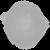

In [ ]:
img

In [ ]:
print(prediction)

(Category tensor(1), tensor(1), tensor([0.0027, 0.9973]))


In [ ]:
image=cv2.imread('downloads\malariaparasite.jpg')

In [ ]:
prediction=learn.predict(image)
print(prediction)

(Category tensor(0), tensor(0), tensor([0.9948, 0.0052]))
